# USA Maryland State Crime Dataset


# 1: Initial Setup

## 1.1: Installing Libraries

In [ ]:
# Installing all the required libraries
!pip install numpy
!pip install pandas
!pip install datetime
!pip install matplotlib
!pip install seaborn
!pip install folium
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 817 kB/s 
     |████████████████████████████████| 261 kB 10.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1.2: Importing Libraries

In [ ]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Importing data for START_DATE/END_DATE and DISPATCH_TIME
from datetime import datetime 

# Importnig libaries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap
import folium

# Importing the libarary for working with geographical data
from geopy.geocoders import Nominatim
from random import randint
from time import sleep

## 1.3: Uploading the Dataset

In [ ]:
# Read the csv file into a dataframe
df = pd.read_csv('Crime.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201202980,3550,180042096.0,08/23/2018 09:52:08 PM,35B,1.0,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,...,NaN,MIDDLEBROOK,NaN,RD,08/23/2018 09:52:00 PM,NaN,39.177744,-77.265619,5D,"(39.1777, -77.2656)"
1,201181293,3522,180015424.0,03/30/2018 01:00:55 AM,35A,1.0,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
2,201181293,3562,180015424.0,03/30/2018 01:00:55 AM,35A,1.0,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
3,201193163,3520,180029476.0,06/14/2018 10:26:45 PM,35A,1.0,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,...,NaN,QUINCE ORCHARD,NaN,RD,06/14/2018 10:26:00 PM,06/15/2018 03:00:00 AM,39.147954,-77.218189,6D,"(39.148, -77.2182)"
4,201204355,2204,180043926.0,09/03/2018 12:06:54 PM,220,1.0,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,NaN,FALSTONE,NaN,AVE,09/02/2018 11:30:00 PM,09/03/2018 12:30:00 AM,38.966174,-77.096561,2D,"(38.9662, -77.0966)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263384,201271909,1117.0,200000189.0,01/02/2020 09:21:33 AM,11D,1.0,Crime Against Person,Forcible Fondling,SEX ASSAULT - CARNAL ABUSE,MONTGOMERY VILLAGE,...,NaN,CLOPPER,NaN,RD,01/02/2020 09:21:00 AM,NaN,39.144500,-77.225454,6D,"(39.1445, -77.2255)"
263385,201272741,2307.0,200001257.0,01/08/2020 10:50:38 AM,23E,1.0,Crime Against Property,From Coin/Operated Machine or Device,LARCENY - FROM COIN MACHINE,WHEATON,...,NaN,AMHERST,NaN,AVE,12/27/2019 11:30:00 AM,12/31/2019 10:00:00 AM,39.041350,-77.048238,4D,"(39.0413, -77.0482)"
263386,201270514,5404.0,190061454.0,12/21/2019 01:46:36 AM,90D,1.0,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,MONTGOMERY VILLAGE,...,NaN,WATKINS STATION,NaN,CIR,12/21/2019 01:46:00 AM,NaN,39.159852,-77.217768,6D,"(39.1599, -77.2178)"
263387,201283147,2308.0,200013978.0,03/25/2020 06:03:00 PM,23D,1.0,Crime Against Property,Theft from Building,LARCENY - FROM BLDG,SILVER SPRING,...,NaN,GEORGIA,NaN,AVE,03/25/2020 01:00:00 AM,03/25/2020 01:15:00 AM,38.990645,-77.026675,3D,"(38.9906, -77.0267)"


In [ ]:
# Printing the first eight records
print(df.head(8))

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201202980,3550,180042096.0,08/23/2018 09:52:08 PM,35B,1.0,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,...,NaN,MIDDLEBROOK,NaN,RD,08/23/2018 09:52:00 PM,NaN,39.177744,-77.265619,5D,"(39.1777, -77.2656)"
1,201181293,3522,180015424.0,03/30/2018 01:00:55 AM,35A,1.0,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
2,201181293,3562,180015424.0,03/30/2018 01:00:55 AM,35A,1.0,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
3,201193163,3520,180029476.0,06/14/2018 10:26:45 PM,35A,1.0,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,...,NaN,QUINCE ORCHARD,NaN,RD,06/14/2018 10:26:00 PM,06/15/2018 03:00:00 AM,39.147954,-77.218189,6D,"(39.148, -77.2182)"
4,201204355,2204,180043926.0,09/03/2018 12:06:54 PM,220,1.0,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,NaN,FALSTONE,NaN,AVE,09/02/2018 11:30:00 PM,09/03/2018 12:30:00 AM,38.966174,-77.096561,2D,"(38.9662, -77.0966)"


In [ ]:
# Printing the last eight records
print(df.tail(8))

# 2: Initial Data Quality Assessment

## 2.1: Detecting Missing/Null Values

In [ ]:
# Overview of the records and columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263389 entries, 0 to 263388
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Incident ID             263389 non-null  int64  
 1   Offence Code            263388 non-null  object 
 2   CR Number               263388 non-null  float64
 3   Dispatch Date / Time    215078 non-null  object 
 4   NIBRS Code              263388 non-null  object 
 5   Victims                 263388 non-null  float64
 6   Crime Name1             263229 non-null  object 
 7   Crime Name2             263229 non-null  object 
 8   Crime Name3             263229 non-null  object 
 9   Police District Name    263295 non-null  object 
 10  Block Address           240692 non-null  object 
 11  City                    262401 non-null  object 
 12  State                   263388 non-null  object 
 13  Zip Code                260220 non-null  float64
 14  Agency              

In [ ]:
# Checking null values in the different columns
print(df.isna().sum())

Incident ID                    0
Offence Code                   1
CR Number                      1
Dispatch Date / Time       48311
NIBRS Code                     1
Victims                        1
Crime Name1                  160
Crime Name2                  160
Crime Name3                  160
Police District Name          94
Block Address              22697
City                         988
State                          1
Zip Code                    3169
Agency                         1
Place                          1
Sector                      1523
Beat                        1523
PRA                          232
Address Number             22617
Street Prefix             251585
Street Name                    1
Street Suffix             258690
Street Type                  321
Start_Date_Time                1
End_Date_Time             140775
Latitude                       1
Longitude                      1
Police District Number         1
Location                       1
dtype: int

## 2.2: Detecting Duplicates

In [ ]:
# Checking any record duplications
print(df.duplicated().sum()) #we have no duplicates in this data

0

## 2.3: Detecting Outliers

In [ ]:
def outliers(data_f, feature):
    '''
    This function computes the Upper Limit and Lower Limit for the given feature using IQR,
    and then returns them.
    ''' 
    print(f"\n\nStatistics before removing outliers from {feature}: ")
    print(data_f[feature].describe(percentiles=[.05, .25, .5, .75, .90, .95]))
    Q1= data_f[feature].quantile(0.25)
    Q3 = data_f[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

def print_outliers(data_f, feature):
    '''
    This function plots the given feature using boxplot and prints the outliers in a given feature.
    '''
    sns.boxplot(x=data_f[feature])
    upper, lower = outliers(data_f, feature)
    print("Upper whisker: ", upper)
    print("Lower Whisker: ", lower)
    print(data_f[(data_f[feature] < lower) | (data_f[feature] > upper)])

### 2.3.1: Outliers in Victims



Statistics before removing outliers from Victims: 
count    263388.000000
mean          1.021839
std           0.191375
min           1.000000
5%            1.000000
25%           1.000000
50%           1.000000
75%           1.000000
90%           1.000000
95%           1.000000
max          22.000000
Name: Victims, dtype: float64
Upper whisker:  1.0
Lower Whisker:  1.0
        Incident ID Offence Code    CR Number    Dispatch Date / Time  \
80        201261625         1399  190050287.0  10/20/2019 02:30:00 AM   
146       201292971         1399  200025327.0  06/29/2020 05:18:19 PM   
157       201340170         1399  210029773.0  08/01/2021 12:33:18 AM   
190       201163756         1199  170544973.0  11/26/2017 11:52:42 AM   
249       201336398         1399  210025016.0  06/29/2021 11:24:56 PM   
...             ...          ...          ...                     ...   
263190    201272391       1399.0  200000792.0  01/05/2020 08:24:21 PM   
263254    201284976       1313.0  200016

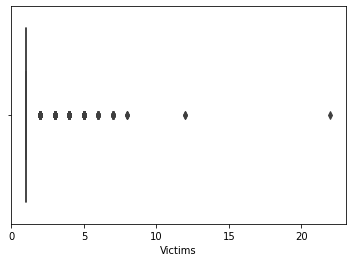

In [ ]:
print_outliers(df, "Victims")

Decision: We are not considering to remove these records, as they include crucial information.

### 2.3.2: Outliers in Latitude and Longtitude



Statistics before removing outliers from Latitude: 
count    263388.000000
mean         38.012158
std           6.376074
min           0.000000
5%           38.975921
25%          39.020198
50%          39.072823
75%          39.141910
90%          39.178474
95%          39.193933
max          39.342140
Name: Latitude, dtype: float64
Upper whisker:  39.324478114
Lower Whisker:  38.837629809999996
        Incident ID Offence Code    CR Number    Dispatch Date / Time  \
13        201357499         5404  210051644.0  12/18/2021 11:30:27 PM   
42        201358863         5404  210053293.0  12/31/2021 01:47:33 AM   
53        201346532         2305  210037745.0  09/24/2021 05:25:58 AM   
162       201357957         9105  210052242.0  12/22/2021 05:25:02 PM   
200       201336300         2303  210024908.0  06/29/2021 11:47:11 AM   
...             ...          ...          ...                     ...   
261953    201268893         1313  190059548.0  12/10/2019 04:47:17 PM   
262426    2012

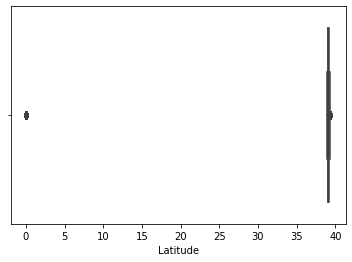

In [ ]:
print_outliers(df, "Latitude")



Statistics before removing outliers from Longitude: 
count    263388.000000
mean        -75.004858
std          12.580741
min         -77.516753
5%          -77.267350
25%         -77.196802
50%         -77.098934
75%         -77.028748
90%         -76.988100
95%         -76.947284
max           0.000000
Name: Longitude, dtype: float64
Upper whisker:  -76.776667703
Lower Whisker:  -77.44888262299999
        Incident ID Offence Code    CR Number    Dispatch Date / Time  \
13        201357499         5404  210051644.0  12/18/2021 11:30:27 PM   
42        201358863         5404  210053293.0  12/31/2021 01:47:33 AM   
53        201346532         2305  210037745.0  09/24/2021 05:25:58 AM   
162       201357957         9105  210052242.0  12/22/2021 05:25:02 PM   
200       201336300         2303  210024908.0  06/29/2021 11:47:11 AM   
...             ...          ...          ...                     ...   
261953    201268893         1313  190059548.0  12/10/2019 04:47:17 PM   
262426    2

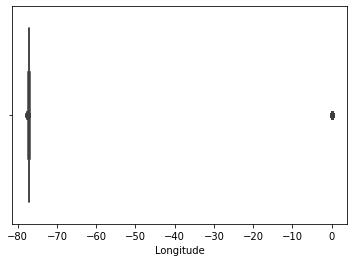

In [ ]:
print_outliers(df, "Longitude")

# 3: Exploratory Data Analysis

## 3.1: Data Cleaning

### 3.1.1: Fixing Crime Names

NIBRS Codes have crime names associated with them. Based on the analysis, it is observed that all the null values of Crime Name columns can be categorized by the following three NIBRS codes - 26G,35A,90Z.

In [ ]:
df.groupby('NIBRS Code').agg({'Crime Name1': lambda x: x.isnull().sum(),'Crime Name2': lambda x: x.isnull().sum()})

,Crime Name1,Crime Name2
NIBRS Code,,
09A,0,0
09B,0,0
09C,0,0
100,0,0
11A,0,0
11B,0,0
11C,0,0
11D,0,0
120,0,0


According to the official documentation, NIBRS Codes have a crime name and crime against detail associated with each of them. Using this information, the Crime Name 1 and Crime Name 2 columns can be replaced by their corresponding NIBRS Codes information.
In the code below, every row in the dataframe is checked if the NIBRS Code is one of the three codes mentioned above(26G,35A,90Z). If the NIBRS codes of the rows match one of these, it will replace the Crime Name 1 and Crime Name 2 fields with their corresponding crime name details in accordance with the official documentation. 

In [ ]:
# The code checks if the NIBRS Code of the rows getting processed in one of the three codes, and maps the column based on the condition, using fillna() method, we replace the null values.
def replace_crime_name(df, nibrs_code, crime_name_1, crime_name_2):
    cond=df['NIBRS Code']==nibrs_code
    df['Crime Name1'] = df['Crime Name1'].fillna(cond.map({True: crime_name_1}))
    df['Crime Name2'] = df['Crime Name2'].fillna(cond.map({True: crime_name_2}))
    return df



In [ ]:
df = replace_crime_name(df, '26G', 'Crime Against Property', 'Hacking/Computer Invasion')
df = replace_crime_name(df, '35A', 'Crime Against Society', 'Drug/Narcotic Violations')
df = replace_crime_name(df, '90Z', 'Crime Against Society/Property/Person', 'All Other Offences')

In [ ]:
# Number of null values in crime name1 column, after replacing them
df['Crime Name1'].isna().sum()

1

In [ ]:
# Number of null values in crime name2 column, after replacing them
df['Crime Name2'].isna().sum()

1

### 3.1.2: Fixing Police District Names

For the ‘Police District Name’ feature, there are 94 null values. To fix these, we looked into the ‘Police District Number’ and see what is the ‘Police District Number’ for those missing ‘Police District Name’.
We found out that those missing police district names have the following police district numbers:
8.0D,6.0D, 5.0D, 4.0D, 3.0D, and 1.0D
We then filtered those records that have police district names for these police district numbers. We found out that there exists a one-to-one mapping as follows:
* ‘8D':'CITY OF TAKOMA PARK',
* '6D': 'MONTGOMERY VILLAGE',
* '5D': 'GERMANTOWN',
* '4D': 'WHEATON',
* '3D': 'SILVER SPRING',
* '1D': 'ROCKVILLE'

Now, all we have to do is replace those invalid police district names by replacing them using the above dictionary.
We take one record, check the police district number, and then replace the null police district name with the respective name from the dictionary.o accomplish this we applied value_counts() and isna() to count the null values. 


In [ ]:
def replace_null_police_district_name(df_n, police_district_num):
    '''
    This function is replacing null police district names according to the police_dist_name_dict (explained above)
    and returning a new  dataframe that doesnt have any null record for police district name
    '''
    police_dist_name_dict ={
        '8.0D': 'CITY OF TAKOMA PARK',
        '6.0D': 'MONTGOMERY VILLAGE',
        '5.0D': 'GERMANTOWN',
        '4.0D': 'WHEATON',
        '3.0D': 'SILVER SPRING',
        '1.0D': 'ROCKVILLE'
    }
    print("\n---------------------------")
    print("Null values before replacement:")
    print("---------------------------")
    print(df[df['Police District Name'].isna()]['Police District Number'].value_counts())
    df_num = df[df['Police District Name'].isna()]['Police District Number'] == police_district_num
    indexes = df[df['Police District Name'].isna()][df_num]['Police District Name'].index
    df.iloc[indexes, 9] = police_dist_name_dict[police_district_num]
    print("---------------------------")
    print("Null values after replacement:")
    print("---------------------------")
    print(df[df['Police District Name'].isna()]['Police District Number'].value_counts())
    return df

# Check if both Police district name and number are null then remove those records
def remove_null_records(df, feature):
    '''
    This function is removing those records that have null values in the given feature and returning the modified dataframe
    '''
    print("\n---------------------------")
    print("Null values before replacement:")
    print("---------------------------")
    print(df[df[feature].isna()].value_counts())
    df = df[df[feature].notna()]
    print("---------------------------")
    print("Null values after replacement:")
    print("---------------------------")
    print(df[df[feature].isna()].value_counts())
    return df

In [ ]:
df = replace_null_police_district_name(df,'8.0D')


---------------------------
Null values before replacement:
---------------------------
8.0D    81
3.0D     6
6.0D     2
5.0D     2
1.0D     1
4.0D     1
Name: Police District Number, dtype: int64
---------------------------
Null values after replacement:
---------------------------
3.0D    6
6.0D    2
5.0D    2
1.0D    1
4.0D    1
Name: Police District Number, dtype: int64


In [ ]:
df = replace_null_police_district_name(df,'3.0D')


---------------------------
Null values before replacement:
---------------------------
3.0D    6
6.0D    2
5.0D    2
1.0D    1
4.0D    1
Name: Police District Number, dtype: int64
---------------------------
Null values after replacement:
---------------------------
6.0D    2
5.0D    2
1.0D    1
4.0D    1
Name: Police District Number, dtype: int64


In [ ]:
df = replace_null_police_district_name(df,'6.0D')


---------------------------
Null values before replacement:
---------------------------
6.0D    2
5.0D    2
1.0D    1
4.0D    1
Name: Police District Number, dtype: int64
---------------------------
Null values after replacement:
---------------------------
5.0D    2
1.0D    1
4.0D    1
Name: Police District Number, dtype: int64


In [ ]:
df = replace_null_police_district_name(df,'5.0D')


---------------------------
Null values before replacement:
---------------------------
5.0D    2
1.0D    1
4.0D    1
Name: Police District Number, dtype: int64
---------------------------
Null values after replacement:
---------------------------
1.0D    1
4.0D    1
Name: Police District Number, dtype: int64


In [ ]:
df = replace_null_police_district_name(df,'1.0D')


---------------------------
Null values before replacement:
---------------------------
1.0D    1
4.0D    1
Name: Police District Number, dtype: int64
---------------------------
Null values after replacement:
---------------------------
4.0D    1
Name: Police District Number, dtype: int64


In [ ]:
df = replace_null_police_district_name(df,'4.0D')


---------------------------
Null values before replacement:
---------------------------
4.0D    1
Name: Police District Number, dtype: int64
---------------------------
Null values after replacement:
---------------------------
Series([], Name: Police District Number, dtype: int64)


In [ ]:
df = remove_null_records(df, 'Police District Name')


---------------------------
Null values before replacement:
---------------------------
Series([], Name: Police District Number, dtype: int64)
---------------------------
Null values after replacement:
---------------------------
Series([], Name: Police District Number, dtype: int64)


### 3.1.3: Fixing Police District Numbers

While replacing the police district names, we figured out that all those records that have null police district names have some input error for police district numbers as well as the numbers for those records are 8.0D,6.0D, 5.0D, 4.0D, 3.0D, 1.0D. If we group police district numbers we will see that the distribution is something like the following:

* 3D=20066
* 6D=19344
* 4D=19200
* 1D=16658
* 2D=16034
* 5D=13768
* 8D=1590
* TPPD=1204
* OTHER=212
* 8.0D=81
* 3.0D=6
* 6.0D=2
* 5.0D=2
* 1.0D=1
* 4.0D=1

It seems like while data entry for the police district number (in cases where the police district name is missing or null) some kind of float or the double value was entered by concatenating it with ‘D’ while in normal cases, an integer value was entered concatenating it with ‘D’ thus those records that have police district names as null, also have police district number with an additional ‘.0’. 
We also double-checked this by filtering the City feature for both police district numbers (with and without ‘.0’) and found out that these both numbers have the exact same mapping with regards to the other features as well.
Thus we came to the conclusion that this is some input error and to fix that we will simply replace those numbers with ‘.0’ with numbers that don't have ‘.0’.
We did this using replace function:

df['Police District Number'].replace(to_replace=number, value=replacement, inplace=True)


In [ ]:
def replace_police_district_number(df, number, replacement):
    '''
    This function is replacing police district number with the right replacement(explained above) and returning the modified dataframe
    '''
    print("\n-----------------------------------")
    print(f'Before replacing {number} with {replacement}:')
    print("-------------------------------------")
    print(df['Police District Number'].value_counts())
    df['Police District Number'].replace(to_replace=number, value=replacement, inplace=True)
    print("\n-----------------------------------")
    print(f'After replacing {number} with {replacement}:')
    print("-------------------------------------")
    print(df['Police District Number'].value_counts())
    return df


In [ ]:
df = replace_police_district_number(df, '1.0D', '1D')


-----------------------------------
Before replacing 1.0D with 1D:
-------------------------------------
3D       55149
4D       49861
6D       45097
2D       36470
1D       36064
5D       33589
8D        5223
TPPD      1284
OTHER      238
8.0D        81
3.0D         6
6.0D         2
5.0D         2
1.0D         1
4.0D         1
Name: Police District Number, dtype: int64

-----------------------------------
After replacing 1.0D with 1D:
-------------------------------------
3D       55149
4D       49861
6D       45097
2D       36470
1D       36065
5D       33589
8D        5223
TPPD      1284
OTHER      238
8.0D        81
3.0D         6
6.0D         2
5.0D         2
4.0D         1
Name: Police District Number, dtype: int64


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df = replace_police_district_number(df, '4.0D', '4D')


-----------------------------------
Before replacing 4.0D with 4D:
-------------------------------------
3D       55149
4D       49861
6D       45097
2D       36470
1D       36065
5D       33589
8D        5223
TPPD      1284
OTHER      238
8.0D        81
3.0D         6
6.0D         2
5.0D         2
4.0D         1
Name: Police District Number, dtype: int64

-----------------------------------
After replacing 4.0D with 4D:
-------------------------------------
3D       55149
4D       49862
6D       45097
2D       36470
1D       36065
5D       33589
8D        5223
TPPD      1284
OTHER      238
8.0D        81
3.0D         6
6.0D         2
5.0D         2
Name: Police District Number, dtype: int64


In [ ]:
df = replace_police_district_number(df, '5.0D', '5D')


-----------------------------------
Before replacing 5.0D with 5D:
-------------------------------------
3D       55149
4D       49862
6D       45097
2D       36470
1D       36065
5D       33589
8D        5223
TPPD      1284
OTHER      238
8.0D        81
3.0D         6
6.0D         2
5.0D         2
Name: Police District Number, dtype: int64

-----------------------------------
After replacing 5.0D with 5D:
-------------------------------------
3D       55149
4D       49862
6D       45097
2D       36470
1D       36065
5D       33591
8D        5223
TPPD      1284
OTHER      238
8.0D        81
3.0D         6
6.0D         2
Name: Police District Number, dtype: int64


In [ ]:
df = replace_police_district_number(df, '6.0D', '6D')


-----------------------------------
Before replacing 6.0D with 6D:
-------------------------------------
3D       55149
4D       49862
6D       45097
2D       36470
1D       36065
5D       33591
8D        5223
TPPD      1284
OTHER      238
8.0D        81
3.0D         6
6.0D         2
Name: Police District Number, dtype: int64

-----------------------------------
After replacing 6.0D with 6D:
-------------------------------------
3D       55149
4D       49862
6D       45099
2D       36470
1D       36065
5D       33591
8D        5223
TPPD      1284
OTHER      238
8.0D        81
3.0D         6
Name: Police District Number, dtype: int64


In [ ]:
df = replace_police_district_number(df, '3.0D', '3D')


-----------------------------------
Before replacing 3.0D with 3D:
-------------------------------------
3D       55149
4D       49862
6D       45099
2D       36470
1D       36065
5D       33591
8D        5223
TPPD      1284
OTHER      238
8.0D        81
3.0D         6
Name: Police District Number, dtype: int64

-----------------------------------
After replacing 3.0D with 3D:
-------------------------------------
3D       55155
4D       49862
6D       45099
2D       36470
1D       36065
5D       33591
8D        5223
TPPD      1284
OTHER      238
8.0D        81
Name: Police District Number, dtype: int64


In [ ]:
df = replace_police_district_number(df, '8.0D', '8D')


-----------------------------------
Before replacing 8.0D with 8D:
-------------------------------------
3D       55155
4D       49862
6D       45099
2D       36470
1D       36065
5D       33591
8D        5223
TPPD      1284
OTHER      238
8.0D        81
Name: Police District Number, dtype: int64

-----------------------------------
After replacing 8.0D with 8D:
-------------------------------------
3D       55155
4D       49862
6D       45099
2D       36470
1D       36065
5D       33591
8D        5304
TPPD      1284
OTHER      238
Name: Police District Number, dtype: int64


### 3.1.4: Fixing Beats and Sectors

In [ ]:
df.groupby('Police District Number').agg({'Beat': lambda x: x.isnull().sum(),'Sector': lambda x: x.isnull().sum()})

,Beat,Sector
Police District Number,,
1D,0,0
2D,0,0
3D,0,0
4D,0,0
5D,0,0
6D,0,0
8D,0,0
OTHER,238,238
TPPD,1284,1284


In [ ]:
# This function checks the police district number and replaces its corresponding beats/sectors with other.
def replace_beats_and_sectors_null(df, police_district_number):
    cond_district = df['Police District Number'] == police_district_number
    df['Sector'] = df['Sector'].fillna(cond_district.map({True:'Other'}))
    df['Beat'] = df['Beat'].fillna(cond_district.map({True:'Other'}))
    return df

In [ ]:
df = replace_beats_and_sectors_null(df,'TPPD')
df = replace_beats_and_sectors_null(df,'OTHER')

<ipython-input-47-f83abd8d803a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sector'] = df['Sector'].fillna(cond_district.map({True:'Other'}))
<ipython-input-47-f83abd8d803a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Beat'] = df['Beat'].fillna(cond_district.map({True:'Other'}))


### 3.1.5: Fixing geographical data - Latitude and Logitude, City and State

In [ ]:
# Checking all US States and their counts in the dataset

print(df['State'].value_counts()) # This gives a count of all the US States, there are typing errors and need to be fixed

# USA States have Abbreviations and FIPS for all states
# We will need to change all the records to follow the standard abbreviation

# DataFrame of USA States with ABBREVIATIONS and FIPS
# (ref https://www.bls.gov/respondents/mwr/electronic-data-interchange/appendix-d-usps-state-abbreviations-and-fips-codes.htm)

state_names = ['Maryland','Idaho','District of Columbia','Virginia','Maine','Mississippi','North Dakota','Hawaii',np.nan,np.nan,'Illinois']
state_abbrv = ['MD','ID','DC','VA','ME','MS','ND','HI',np.nan,'MC','IL']
state_fips  = ['24','16','11','51','23','28','38','15','0',np.nan,'17']

df_usa_states = pd.DataFrame({'State':state_names,
                              'Abbreviation':state_abbrv,
                              'FIPS':state_fips})

df_usa_states = df_usa_states.set_index('State')

print(df_usa_states)

# Defining some required variables

geolocator = None # For Nominatim object creation, we need to use different objects as the Nominatim Server has limitations
stored_lat_long_results = {} # For storing addresses retrieved from Nominatim Server, as it denies consequent similar requests

# Defining functions to replace a particular State FIPS to ABBREVIATION, to fix Latitude/Longitude and to fix City/State

# Function 1 : To replace FIPS of a particular State to ABBREVIAIONS in the 'State' column

def replace_FIPS_with_ABBREVIATION(fips):
    '''
    This function takes a particular FIPS, looks for respective State ABBREVIATION in df_usa_states DataFrame
    and replaces in the 'State' column
    '''
    df.replace({'State' : fips}, df_usa_states.loc[df_usa_states['FIPS'] == fips]['Abbreviation'].values[0], inplace=True)

# Function 2 : To fix Latitude/Longitude of rows having (0,0)
def set_correct_lat_long(street, city, state="Maryland"):
    '''
    This function takes the Street, City and State as arguments, and returns the actual Latitude, Longitude.
    It either returns (Latitude, Longitude) or (None, None) if not found.
    '''
    query_address = f"{street} {city} {state}" # Lets attempt to find coordinates with Street, City and State
    location = geolocator.geocode(query_address)
    #sleep(1) # Sleep for 1 second, as Nominatim Server serves 1 request every second
    if location == None:
        # Lets attempt to find coordinates with just City and State now, otherwise return (None, None)
        query_address = f"{city} {state}"
        location = geolocator.geocode(query_address)
        #sleep(1)
        if location == None:
            return None, None
        return location.latitude, location.longitude
    else:
        return location.latitude, location.longitude

# Function 3 : To fix City/State of rows based on Latitude and Longitude if the 'State' is not MD i.e Maryland.
# It will fix any typos in the 'State' column such as 'ME' and 'MS' instead of 'MD', we will retrieve address
# based on the Latitude/Longitude.

def set_correct_address(lat, long):
    '''
    This function will take the latitude and longitude as arguments, and returns the actual address.
    It either returns (City, State) or (Town, State) or (Village, State) 
    or (None,'Maryland') if in the 'Montgomery County' or (None, None) otherwise.
    '''
    if f"{lat}_{long}" in stored_lat_long_results:
        address = stored_lat_long_results[f"{lat}_{long}"]
    else:
        location = geolocator.reverse(str(lat) + ',' + str(long))
        #sleep(1)
        if location == None:
            return None, None
        address = location.raw['address']
        stored_lat_long_results[f"{lat}_{long}"] = address
    
    if 'county' in address and address['county'] == 'Montgomery County':
        if 'city' in address:
            return address['city'], address['state']
        elif 'town' in address:
            return address['town'], address['state']
        elif 'village' in address:
            return address['village'], address['state']
        else:
            # print(f"Returned Address : {address}")
            # Just return None, 'Maryland'
            return None, address['state']
    else:
        return None, None
# df_usa_states.loc[df_usa_states['Abbreviation'] == row['State']].index[0]

MD    262853
16       182
DC        22
VA         3
ME         2
MS         2
ND         1
15         1
0          1
MC         1
Name: State, dtype: int64
                     Abbreviation FIPS
State                                 
Maryland                       MD   24
Idaho                          ID   16
District of Columbia           DC   11
Virginia                       VA   51
Maine                          ME   23
Mississippi                    MS   28
North Dakota                   ND   38
Hawaii                         HI   15
NaN                           NaN    0
NaN                            MC  NaN
Illinois                       IL   17


The following code cell contains clean-up process of the data that takes almost 1.5 hrs to finish in order to fix all the records having Latitude/Longitude as (0, 0) and subsequently the corrections in the City/State values of the records.

**Please Note : We have already ran this code cell, we have commented the code here to prevent unnecessary execution and save time.**

In [ ]:
# # Replace the FIPS with ABBREVIATIONS
# replace_FIPS_with_ABBREVIATION('15')
# replace_FIPS_with_ABBREVIATION('16')
# replace_FIPS_with_ABBREVIATION('17')

# # Fix Latitude/Longitude
# for i, row in df.iterrows():
#     geolocator = Nominatim(user_agent=f"ADP_Group_{randint(10000,9999999)}", timeout=3)
#     if row['Latitude'] == 0 and row['Longitude'] == 0: # Fixing (0,0) in Latitude/Longitude
#         # Add the logic to correct Latitude and Longitude
#         lat, long = set_correct_lat_long(row['Street Name'], row['City'], 'Maryland')
#         if lat == None and long == None:
#             print(f"LAT LONG failed for index : {i}, Row : {df.loc[[i]][['City','State','Latitude','Longitude']]}")
#             continue
#         else:
#             df.at[i,'Latitude'] = lat
#             df.at[i,'Longitude'] = long

# # Fix City/State
# for i, row in df.iterrows():
#     geolocator = Nominatim(user_agent=f"ADP_Group_{randint(10000,9999999)}")
#     # Fixing any incorrections in City/State based on Latitude/Longitude
#     if row['State'] != 'MD':
#         city, state = set_correct_address(row['Latitude'],row['Longitude'])
#         # Check None, None
#         if city == None and state == None:
#             print(f"ADDRESS failed for index : {i}, Row : {df.loc[[i]][['City','State','Latitude','Longitude']]}")
#             continue
#         elif city == None and state == 'Maryland':
#             df.at[i,'State'] = df_usa_states.loc[state]['Abbreviation']
#         else:
#             df.at[i,'City'] = city.upper()
#             df.at[i,'State'] = df_usa_states.loc[state]['Abbreviation']

### 3.1.6: Fixing Street Type

Lets first check if we can replace null street type with block address (by extracting street type from block address)

In [ ]:
df['Street Type'].isna().sum()

0

In [ ]:
df[df['Street Type'].isna()]['Block Address'].isna().sum()

0

As can be shown in the above results. all the block address fields are null where Street type is null. So we cannot extract street type from block address. 
Lets remove the records that have null street type as these records are very few.

In [ ]:
def remove_null_street_type_records(df):
    print("\n-----------------------------------")
    print('Before removing street type null values count:')
    print("-------------------------------------")
    print(df['Street Type'].isna().sum())
    df = df[df['Street Type'].notna()]
    print("\n-----------------------------------")
    print('After removing street type null values count:')
    print("-------------------------------------")
    print(df['Street Type'].isna().sum())
    return df



In [ ]:
df = remove_null_street_type_records(df)


-----------------------------------
Before removing street type null values count:
-------------------------------------
0

-----------------------------------
After removing street type null values count:
-------------------------------------
0


## 3.2: Data Transformations

### 3.2.1: Transforming Start Date / Time

In [ ]:
def sepereta_date_time_feature (df, feature, new_feature_1,  new_feature_2 , year_feature, month_feature, day_feature):
    df[feature] = pd.to_datetime(df[feature], format="%m/%d/%Y %H:%M:%S %p")
    print (f"The first 5 rows after reformating for {feature}:  ")
    print("-------------------------------------")
    print (df[feature].iloc[:5])
    df[new_feature_1] = [d.date() for d in df[feature]]
    df[new_feature_2] = [d.time() for d in df[feature]]
    print (f"after seperation the type of the {feature}: ")
    print("-------------------------------------")
    print (type(df.iloc[2][new_feature_1]))
    # Converting to timestamp,Date(so we can use value_count method)
    df[new_feature_1] = pd.to_datetime(df[new_feature_1])
    print (f"Now the type of the {new_feature_1} changed to: ")
    print("-------------------------------------")
    print(type(df.iloc[2][new_feature_1]))
    print ("The number of crimes in each year:" )
    print("-------------------------------------")
    print (df[new_feature_1].dt.year.value_counts())
    # Changing the date_time format to a proper format, so the are divided to the three columns,
    # year, month, and day
    df[year_feature] = df[new_feature_1].dt.year
    df[month_feature] =df[new_feature_1].dt.month
    df[day_feature] =df[new_feature_1].dt.day
    return df

In [ ]:
df = sepereta_date_time_feature (df, "Start_Date_Time", "start_date",  "start_time" , "start_year", "start_month", "start_day")

NameError: ignored

In [ ]:
df['start_weekday'] = df['start_date'].dt.day_name()
df

### 3.2.2: Transforming Dispatch Date / Time

In [ ]:
# How many null values do we have in dispatch column
df["Dispatch Date / Time"].isna().sum()

48308

In [ ]:
# The percentage of data with null values for dispath column
(df["Dispatch Date / Time"].isna().sum())*100/df.shape[0]

18.363312907689266

### 3.2.3: Extracting Dispatch Date/Time into a separate dataset

There are 49029 null values in the dispatch data time, which can be considered as the 16% of the data. As replacing them is rather an impossible option, we will delete the entire column from the main dataset. So we can keep the records for other features. But, we are going to do some analysis regarding the dispatch time, so, a seperate dataset is extracted from the main dataset, in which the records with null values in this feature is removed, and is going to be used just for the mentioned purpose.



In [ ]:
def extract_dispatch_date_time_df(df):
    df_dispatch = df
    df_dispatch.dropna(subset=['Dispatch Date / Time'], inplace= True)
    df_dispatch["Dispatch Date / Time"].isna().sum()
    print(df_dispatch.shape)
    sepereta_date_time_feature (df_dispatch,"Dispatch Date / Time", "Dispatch_date",  "Dispatch_time" , "Dispatch_year", "Dispatch_month", "Dispatch_day")
    print(df_dispatch.columns)
    return df_dispatch

In [ ]:
df_dispatch = extract_dispatch_date_time_df(df)

(214760, 36)
The first 5 rows after reformating for Dispatch Date / Time:  
-------------------------------------
0   2018-08-23 09:52:08
1   2018-03-30 01:00:55
2   2018-03-30 01:00:55
3   2018-06-14 10:26:45
4   2018-09-03 12:06:54
Name: Dispatch Date / Time, dtype: datetime64[ns]
after seperation the type of the Dispatch Date / Time: 
-------------------------------------
<class 'datetime.date'>
Now the type of the Dispatch_date changed to: 
-------------------------------------
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
The number of crimes in each year:
-------------------------------------
2018    53254
2019    45855
2017    41095
2021    31686
2022    28012
2020    14858
Name: Dispatch_date, dtype: int64
Index(['Incident ID', 'Offence Code', 'CR Number', 'Dispatch Date / Time',
       'NIBRS Code', 'Victims', 'Crime Name1', 'Crime Name2', 'Crime Name3',
       'Police District Name', 'Block Address', 'City', 'State', 'Zip Code',
       'Agency', 'Place', 'Sector', 'Beat'

## 3.3: Dropping Extra Features

We need to drop extra features that are redundant or not required :
- Address Block = Address Number + Street Name + Street Prefix + Street Type + Street Suffix As the result we need to remove Street Prefix  as well as Street Suffix
- Address Number
- Also we are not going to use end_date in any questions 
- Also the dispatch date has a seperate dataframe now, to use for the visualisatoin, so it can be removed from the main dataframe, 

In [ ]:
# Drop the label 'Dispatch Date / Time'
def remove_additional_features(df, feature_name):
    if feature_name in df:
        df.drop(feature_name, inplace=True, axis=1)
        print(f'After removing {feature_name}:')
        print(df.columns)
        return df

### 3.3.1: Dropping Dispatch Date/Time

In [ ]:
df = remove_additional_features(df, 'Dispatch Date / Time')

After removing Dispatch Date / Time:
Index(['Incident ID', 'Offence Code', 'CR Number', 'NIBRS Code', 'Victims',
       'Crime Name1', 'Crime Name2', 'Crime Name3', 'Police District Name',
       'Block Address', 'City', 'State', 'Zip Code', 'Agency', 'Place',
       'Sector', 'Beat', 'PRA', 'Address Number', 'Street Prefix',
       'Street Name', 'Street Suffix', 'Street Type', 'Start_Date_Time',
       'End_Date_Time', 'Latitude', 'Longitude', 'Police District Number',
       'Location', 'start_date', 'start_time', 'start_year', 'start_month',
       'start_day', 'start_weekday', 'Dispatch_date', 'Dispatch_time',
       'Dispatch_year', 'Dispatch_month', 'Dispatch_day'],
      dtype='object')


### 3.3.2: Dropping Block Address

In [ ]:
df = remove_additional_features(df, 'Block Address')

After removing Block Address:
Index(['Incident ID', 'Offence Code', 'CR Number', 'NIBRS Code', 'Victims',
       'Crime Name1', 'Crime Name2', 'Crime Name3', 'Police District Name',
       'City', 'State', 'Zip Code', 'Agency', 'Place', 'Sector', 'Beat', 'PRA',
       'Address Number', 'Street Prefix', 'Street Name', 'Street Suffix',
       'Street Type', 'Start_Date_Time', 'End_Date_Time', 'Latitude',
       'Longitude', 'Police District Number', 'Location', 'start_date',
       'start_time', 'start_year', 'start_month', 'start_day', 'start_weekday',
       'Dispatch_date', 'Dispatch_time', 'Dispatch_year', 'Dispatch_month',
       'Dispatch_day'],
      dtype='object')


### 3.3.3: Dropping Street Prefix

In [ ]:
df = remove_additional_features(df, 'Street Prefix')

After removing Street Prefix:
Index(['Incident ID', 'Offence Code', 'CR Number', 'NIBRS Code', 'Victims',
       'Crime Name1', 'Crime Name2', 'Crime Name3', 'Police District Name',
       'City', 'State', 'Zip Code', 'Agency', 'Place', 'Sector', 'Beat', 'PRA',
       'Address Number', 'Street Name', 'Street Suffix', 'Street Type',
       'Start_Date_Time', 'End_Date_Time', 'Latitude', 'Longitude',
       'Police District Number', 'Location', 'start_date', 'start_time',
       'start_year', 'start_month', 'start_day', 'start_weekday',
       'Dispatch_date', 'Dispatch_time', 'Dispatch_year', 'Dispatch_month',
       'Dispatch_day'],
      dtype='object')


### 3.3.4: Dropping Street Suffix

In [ ]:
df = remove_additional_features(df, 'Street Suffix')

After removing Street Suffix:
Index(['Incident ID', 'Offence Code', 'CR Number', 'NIBRS Code', 'Victims',
       'Crime Name1', 'Crime Name2', 'Crime Name3', 'Police District Name',
       'City', 'State', 'Zip Code', 'Agency', 'Place', 'Sector', 'Beat', 'PRA',
       'Address Number', 'Street Name', 'Street Type', 'Start_Date_Time',
       'End_Date_Time', 'Latitude', 'Longitude', 'Police District Number',
       'Location', 'start_date', 'start_time', 'start_year', 'start_month',
       'start_day', 'start_weekday', 'Dispatch_date', 'Dispatch_time',
       'Dispatch_year', 'Dispatch_month', 'Dispatch_day'],
      dtype='object')


### 3.3.5: Dropping Address Number

In [ ]:
df = remove_additional_features(df, 'Address Number')

After removing Address Number:
Index(['Incident ID', 'Offence Code', 'CR Number', 'NIBRS Code', 'Victims',
       'Crime Name1', 'Crime Name2', 'Crime Name3', 'Police District Name',
       'City', 'State', 'Zip Code', 'Agency', 'Place', 'Sector', 'Beat', 'PRA',
       'Street Name', 'Street Type', 'Start_Date_Time', 'End_Date_Time',
       'Latitude', 'Longitude', 'Police District Number', 'Location',
       'start_date', 'start_time', 'start_year', 'start_month', 'start_day',
       'start_weekday', 'Dispatch_date', 'Dispatch_time', 'Dispatch_year',
       'Dispatch_month', 'Dispatch_day'],
      dtype='object')


### 3.3.6: Dropping Location

In [ ]:
df =  remove_additional_features(df, 'Location')

After removing Location:
Index(['Incident ID', 'Offence Code', 'CR Number', 'NIBRS Code', 'Victims',
       'Crime Name1', 'Crime Name2', 'Crime Name3', 'Police District Name',
       'City', 'State', 'Zip Code', 'Agency', 'Place', 'Sector', 'Beat', 'PRA',
       'Street Name', 'Street Type', 'Start_Date_Time', 'End_Date_Time',
       'Latitude', 'Longitude', 'Police District Number', 'start_date',
       'start_time', 'start_year', 'start_month', 'start_day', 'start_weekday',
       'Dispatch_date', 'Dispatch_time', 'Dispatch_year', 'Dispatch_month',
       'Dispatch_day'],
      dtype='object')


## 3.4: Feature's Normality Distribution

We can generate a frequency histogram to verify if our numerical data is normally distributed. This will guide future statistical research and let us know if the dataset has a normal distribution. For each of the columns of non-binary numerical data, histograms will be made.
Our Numerical data, after data cleaning, in this dataset, are as followed:

- 'Victims'
- 'start_year'
- 'start_month'
- 'start_day'
- 'Dispatch_year'
- 'Dispatch_month'
- 'Dispatch_day'
- 'Latitude'
- 'Longitude'

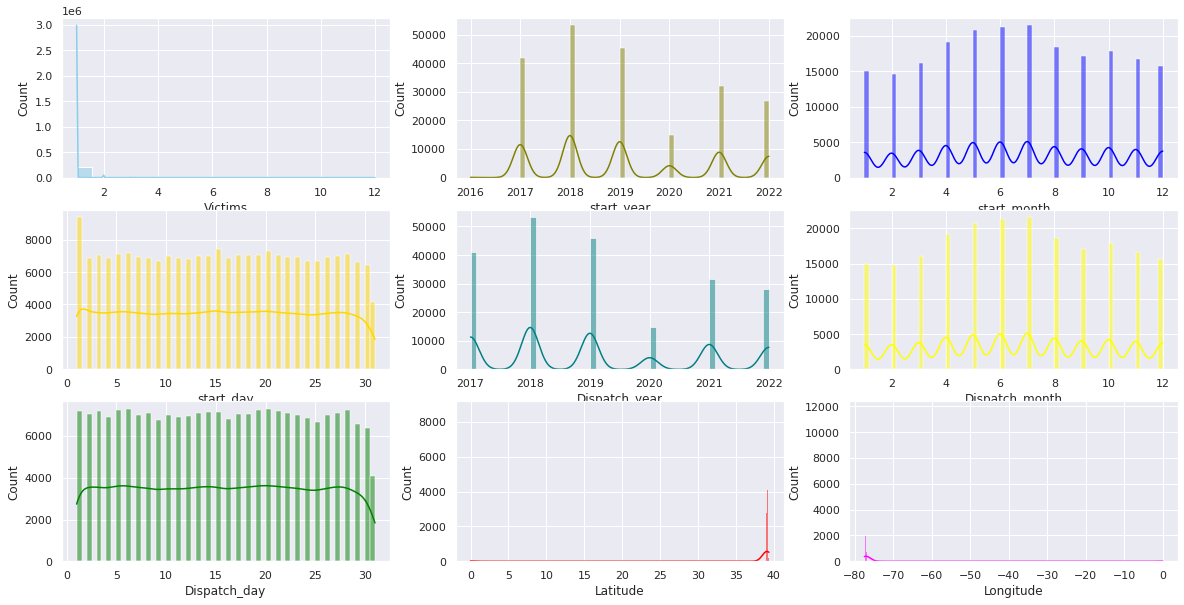

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 3, figsize=(20, 10))

sns.histplot(data=df, x="Victims", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="start_year", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="start_month", kde=True, color="blue", ax=axs[0, 2])
sns.histplot(data=df, x="start_day", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df_dispatch, x="Dispatch_year", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df_dispatch, x="Dispatch_month", kde=True, color="yellow", ax=axs[1, 2])
sns.histplot(data=df_dispatch, x="Dispatch_day", kde=True, color="green", ax=axs[2, 0])
sns.histplot(data=df, x="Latitude", kde=True, color="red", ax=axs[2, 1])
sns.histplot(data=df, x="Longitude", kde=True, color="magenta", ax=axs[2, 2])
plt.savefig('Distribution Plots.png')

plt.show()

## 3.5: Correlation between Features

Most of the variables in this dataset, are categorical data, or mathematically meaningless numerical variables (such as NBRS code). For category (object-type) variables, there is no simple and effective method to produce a meaningful correlation map.As a result, we are going to create a seperate correlation just for the numerical values. 

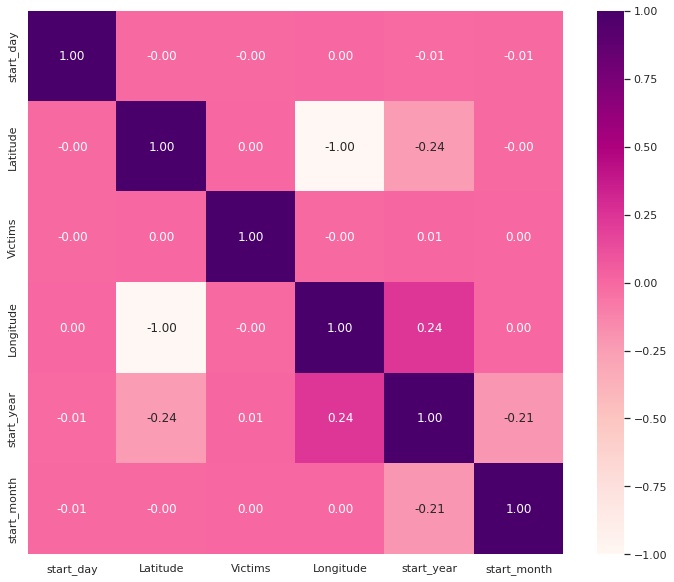

In [ ]:
num_df = pd.DataFrame(data=df, columns={'Victims', 'start_year', 'start_month', 'start_day', 'Latitude', 'Longitude'})

# Creating the correlation map 
df_cor = num_df.corr()

# size of the map
sns.set_theme(rc={'figure.figsize':(12,10)})

# Plotting the heatmap: 
sns.heatmap(df_cor,annot=True,fmt='0.2f',vmin=-1,vmax=1,cmap='RdPu')
plt.savefig('corr_heatmap.png')
plt.show()

## 3.6 Final Cleaned Dataset

#4: Data Visualisation

## 4.1: Question 1 - When do criminals often operate? Which months and days are the busiest? Are there any patterns for these crimes in terms of specific days of the month? Is there a certain month that has the highest or the least criminal activity? 

Months:

Months in %:
7     0.100126
6     0.099022
5     0.097341
4     0.089053
8     0.086022
10    0.083386
9     0.079912
11    0.078157
3     0.075657
12    0.073370
1     0.070092
2     0.067862
Name: start_month, dtype: float64


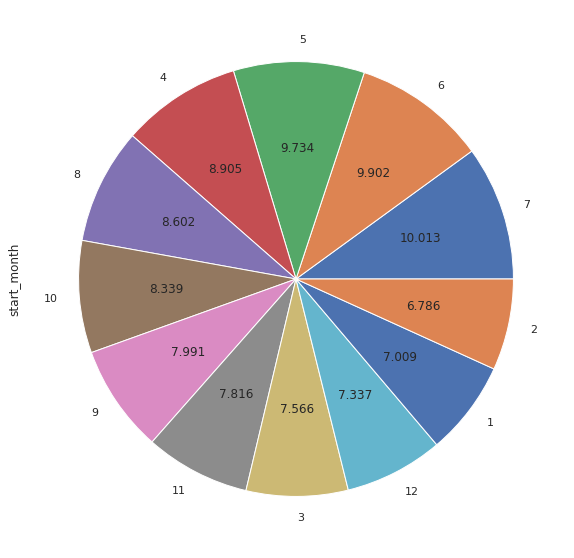

In [ ]:
# Lets first analyze the months and see what trends we can find in there
# normalize = True will normalize the data and give us percentage
print('Months in %:')
print(df['start_month'].value_counts(normalize=True))
df['start_month'].value_counts(normalize=True).plot.pie( autopct='%.3f')
plt.show()

For months, we have used a pie chart. This shows what percentage of crimes are in each month. This shows us the most active month is May which has criminal activities of around 10% and the least active month is Febuarary where around 7.5% of total crimes were committed.


Days:

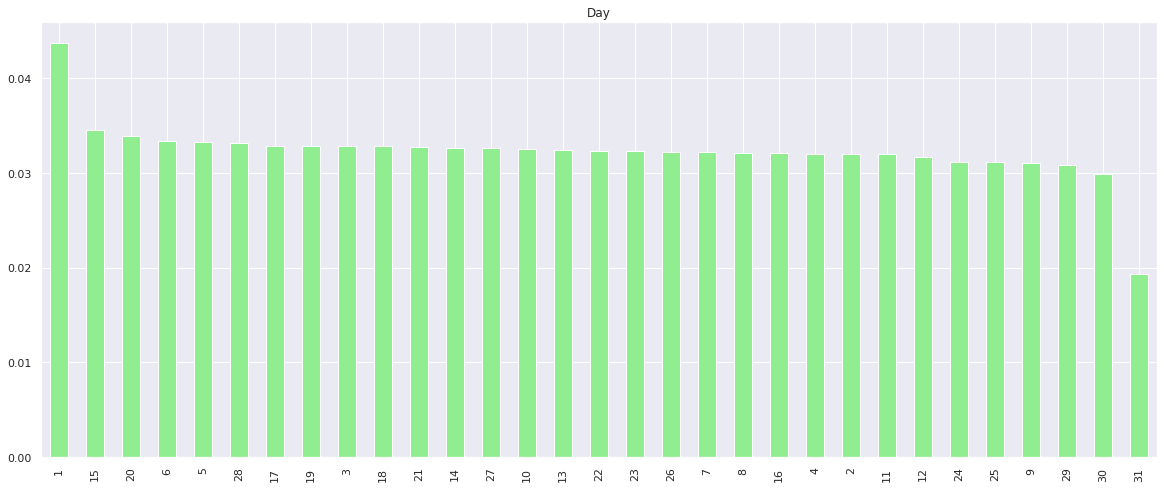

In [ ]:
plt.figure(figsize=(20,8))
df['start_day'].value_counts(normalize=True).plot(kind = 'bar', title = "Day",  color='lightgreen')

Insights:
* Most active day is 1st
* Least active day is 31st

## 4.2: Question 2 - Which crime type has the most affected victims?

Crime Name1:

Crime category-1 in %:
Crime Against Property                   0.425340
Other                                    0.249115
Crime Against Society                    0.214751
Crime Against Person                     0.096629
Not a Crime                              0.014020
Crime Against Society/Property/Person    0.000144
Name: Crime Name1, dtype: float64


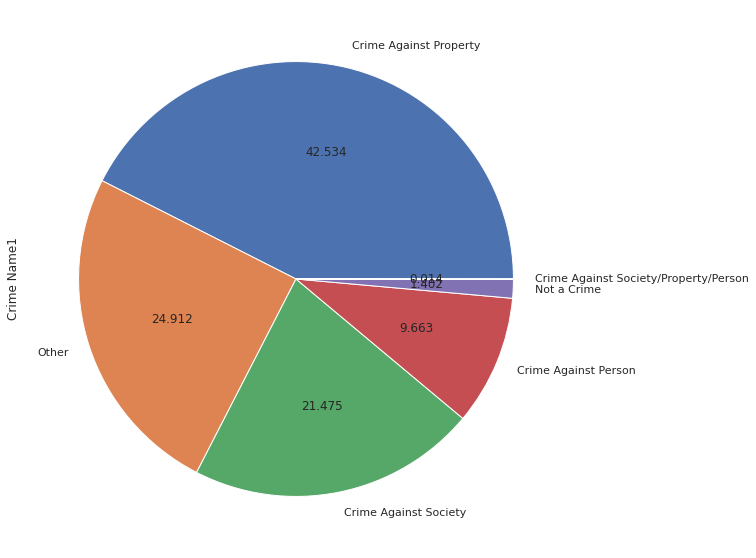

In [ ]:
#df['Crime Name1'].value_counts(normalize=True).plot(kind = 'bar', title = "Crime Name1")
# normalizing the values shows the graph in percentages
print('Crime category-1 in %:')
print(df['Crime Name1'].value_counts(normalize=True))
df['Crime Name1'].value_counts(normalize=True).plot.pie( autopct='%.3f')
plt.show()

Insights:
* Crime Against Property is the most commited crime in Crime1 almost 46.8%
* The least amount of crimes commited are those that arent even considered as crime. in this case 'Not a Crime' around 0.0002%

Crime Name2:

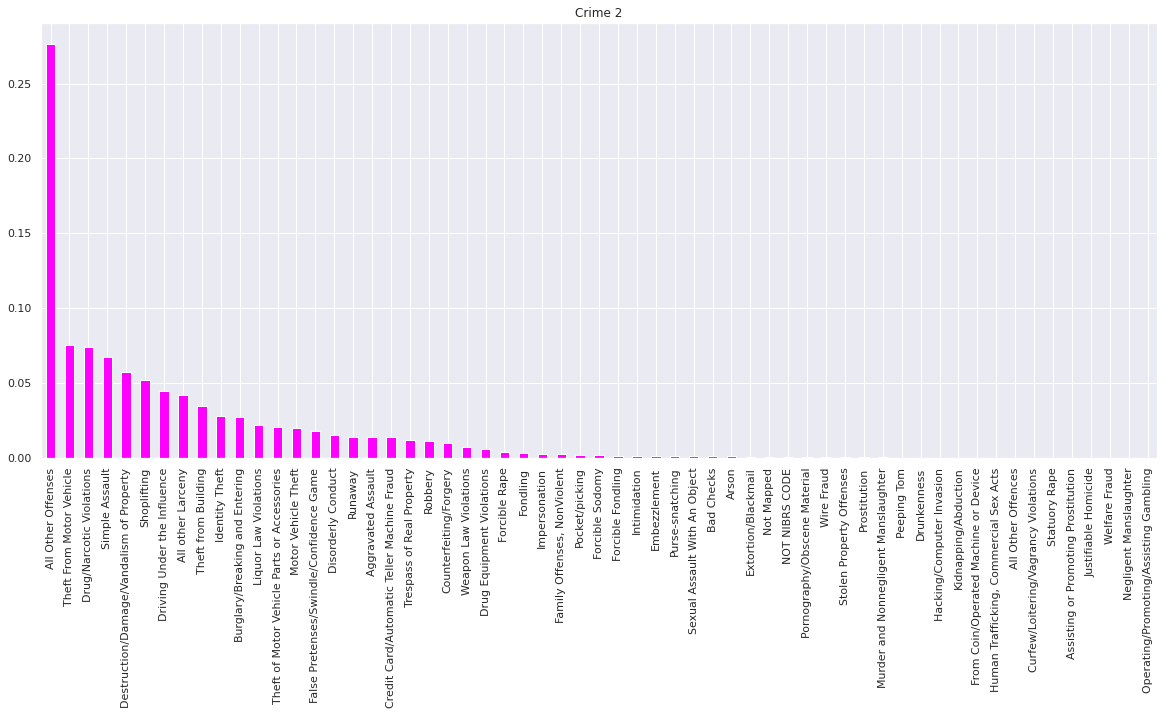

In [ ]:
plt.figure(figsize=(20,8))
df['Crime Name2'].value_counts(normalize=True).plot(kind = 'bar', title = "Crime 2", color='magenta')

In [ ]:
print('Crime category-2 in %:')
print(df['Crime Name2'].value_counts(normalize=True))

Crime category-2 in %:
All Other Offenses                             0.276462
Theft From Motor Vehicle                       0.075792
Drug/Narcotic Violations                       0.073882
Simple Assault                                 0.067331
Destruction/Damage/Vandalism of Property       0.057376
Shoplifting                                    0.051904
Driving Under the Influence                    0.044966
All other Larceny                              0.042089
Theft from Building                            0.035076
Identity Theft                                 0.027789
Burglary/Breaking and Entering                 0.027151
Liquor Law Violations                          0.021759
Theft of Motor Vehicle Parts or Accessories    0.021056
Motor Vehicle Theft                            0.020064
False Pretenses/Swindle/Confidence Game        0.018309
Disorderly Conduct                             0.015562
Runaway                                        0.014020
Aggravated Assault       

Insights:

*   Most commited crime in Crime2 list is 'All Other Offenses' around 55% of total data. These are the crimes that are not categorized in a particular category 
*   Least commited crime in this list is 'Negligent Manslaughter' around 0.00001%
*   Subcategory of 'Not a crime' from crime1 list is 'Runaway' in this list that is comprises of almost 1% records shown in the graph 



Crime Name3:

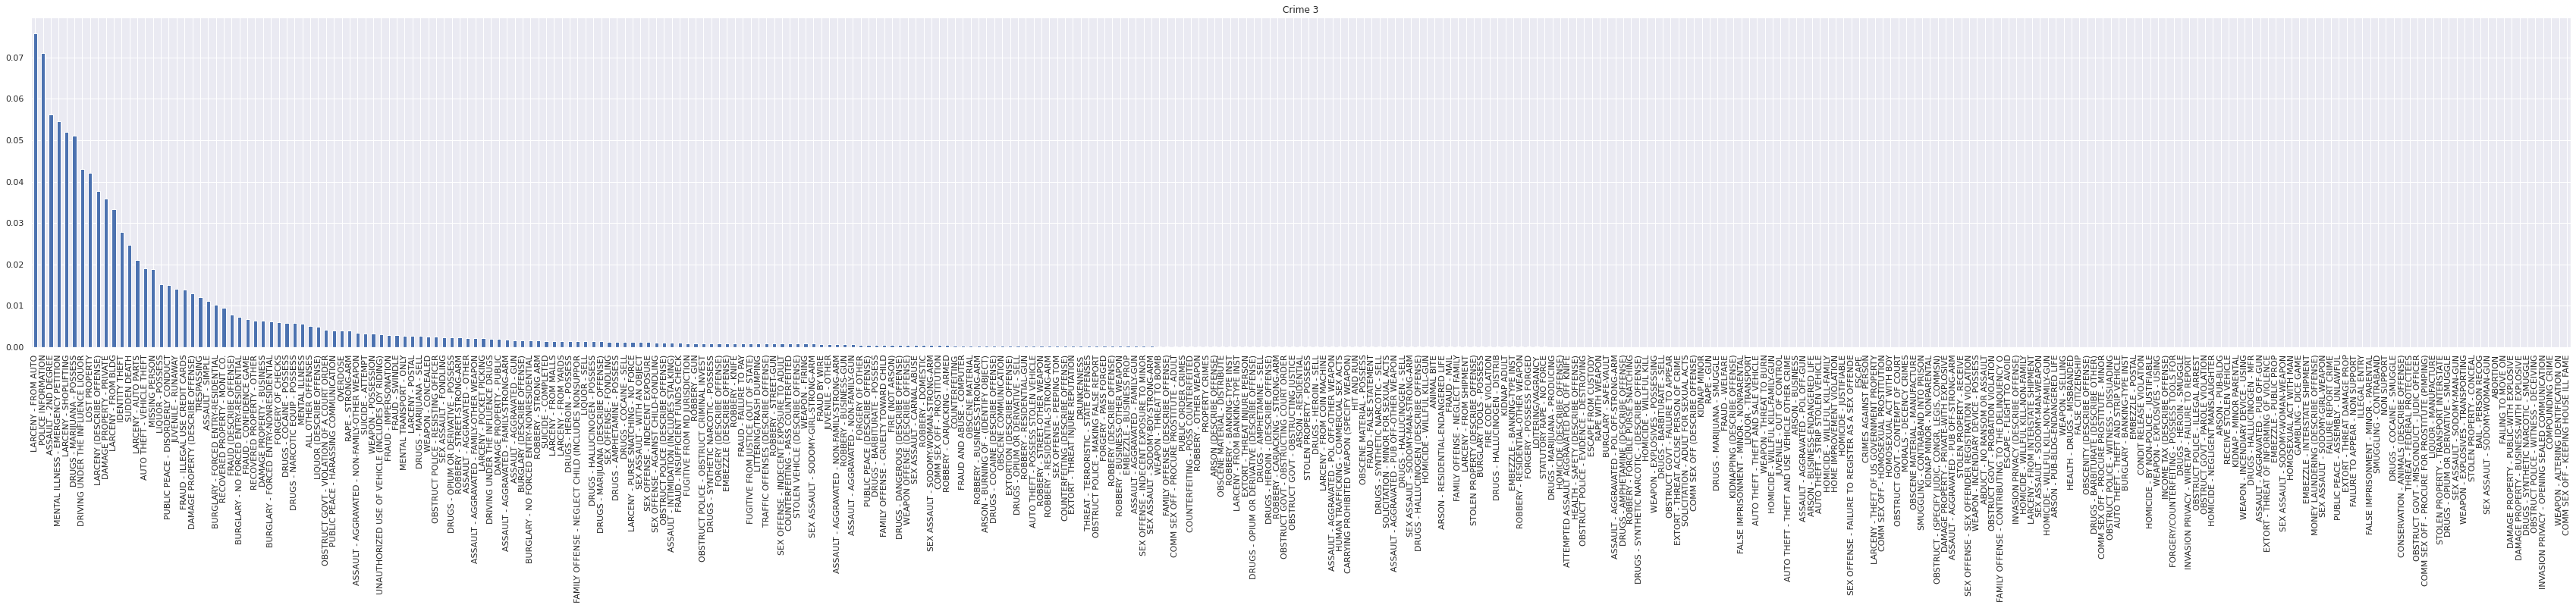

In [ ]:
plt.figure(figsize=(60,8))
df['Crime Name3'].value_counts(normalize=True).plot(kind = 'bar', title = "Crime 3")

In [ ]:
print('Crime category-3 in %:')
print(df['Crime Name3'].value_counts(normalize=True))

Crime category-3 in %:
LARCENY - FROM AUTO                                0.075846
POLICE INFORMATION                                 0.071060
ASSAULT - 2ND DEGREE                               0.056285
MENTAL ILLNESS - EMERGENCY PETITION                0.054593
LARCENY - SHOPLIFTING                              0.051942
                                                     ...   
OBSTRUCT POLICE - WITNESS - DECEIVING              0.000005
INVASION PRIVACY - OPENING SEALED COMMUNICATION    0.000005
COMPOUNDING CRIME                                  0.000005
WEAPON - ALTERING IDENTIFICATION ON                0.000005
COMM SEX OFF - KEEPING HOUSE ILL FAME              0.000005
Name: Crime Name3, Length: 323, dtype: float64


Insights:
* Most commited crimes in this list is 'Larceny from Auto' around 15.4%
* Least commited crime are 'ABductABDUCT - NO RANSOM OR ASSAULT', 'HOMICIDE - WILLFUL KILL-FAMILY-GUN', 'ASSAULT - AGGRAVATED - PUB OFF-GUN ', 'COMM SEX OFF - HOMOSEXUAL PROSTITUTION' and 'OBSTRUCT - (SPECIFY JUDIC, CONGR, LEGIS, COMMSN)' all of them around 0.00001%


## 4.3: Question 3 - For each type of crime, which places are considered the most dangerous/safest? 

The grouped count bar chart allows us to show the relationship between two categorical features in one figure. Places consist of a high number of categories in this dataset, but by creating separate data frames based on the count values of crimes on each place and using `head()` method, we can find the most dangerous places, in which diffrent types of crimes happenes. By using the `hue = 'Place'` on these count bar charts, we can show the values of crimes, where colours distinguish places parameter.




In [ ]:
#As the number of places are too high , lets find the 10 most dengerous place types
df_HP= df['Place'].value_counts().head(10)
#By using .index.tolist() method we can have a list of the 10 most dengerous place types
df_HP = df_HP.index.tolist()
#lets find wich records are included in this list regarding the place type
df_highplace = df.loc[df['Place'].isin (df_HP)]

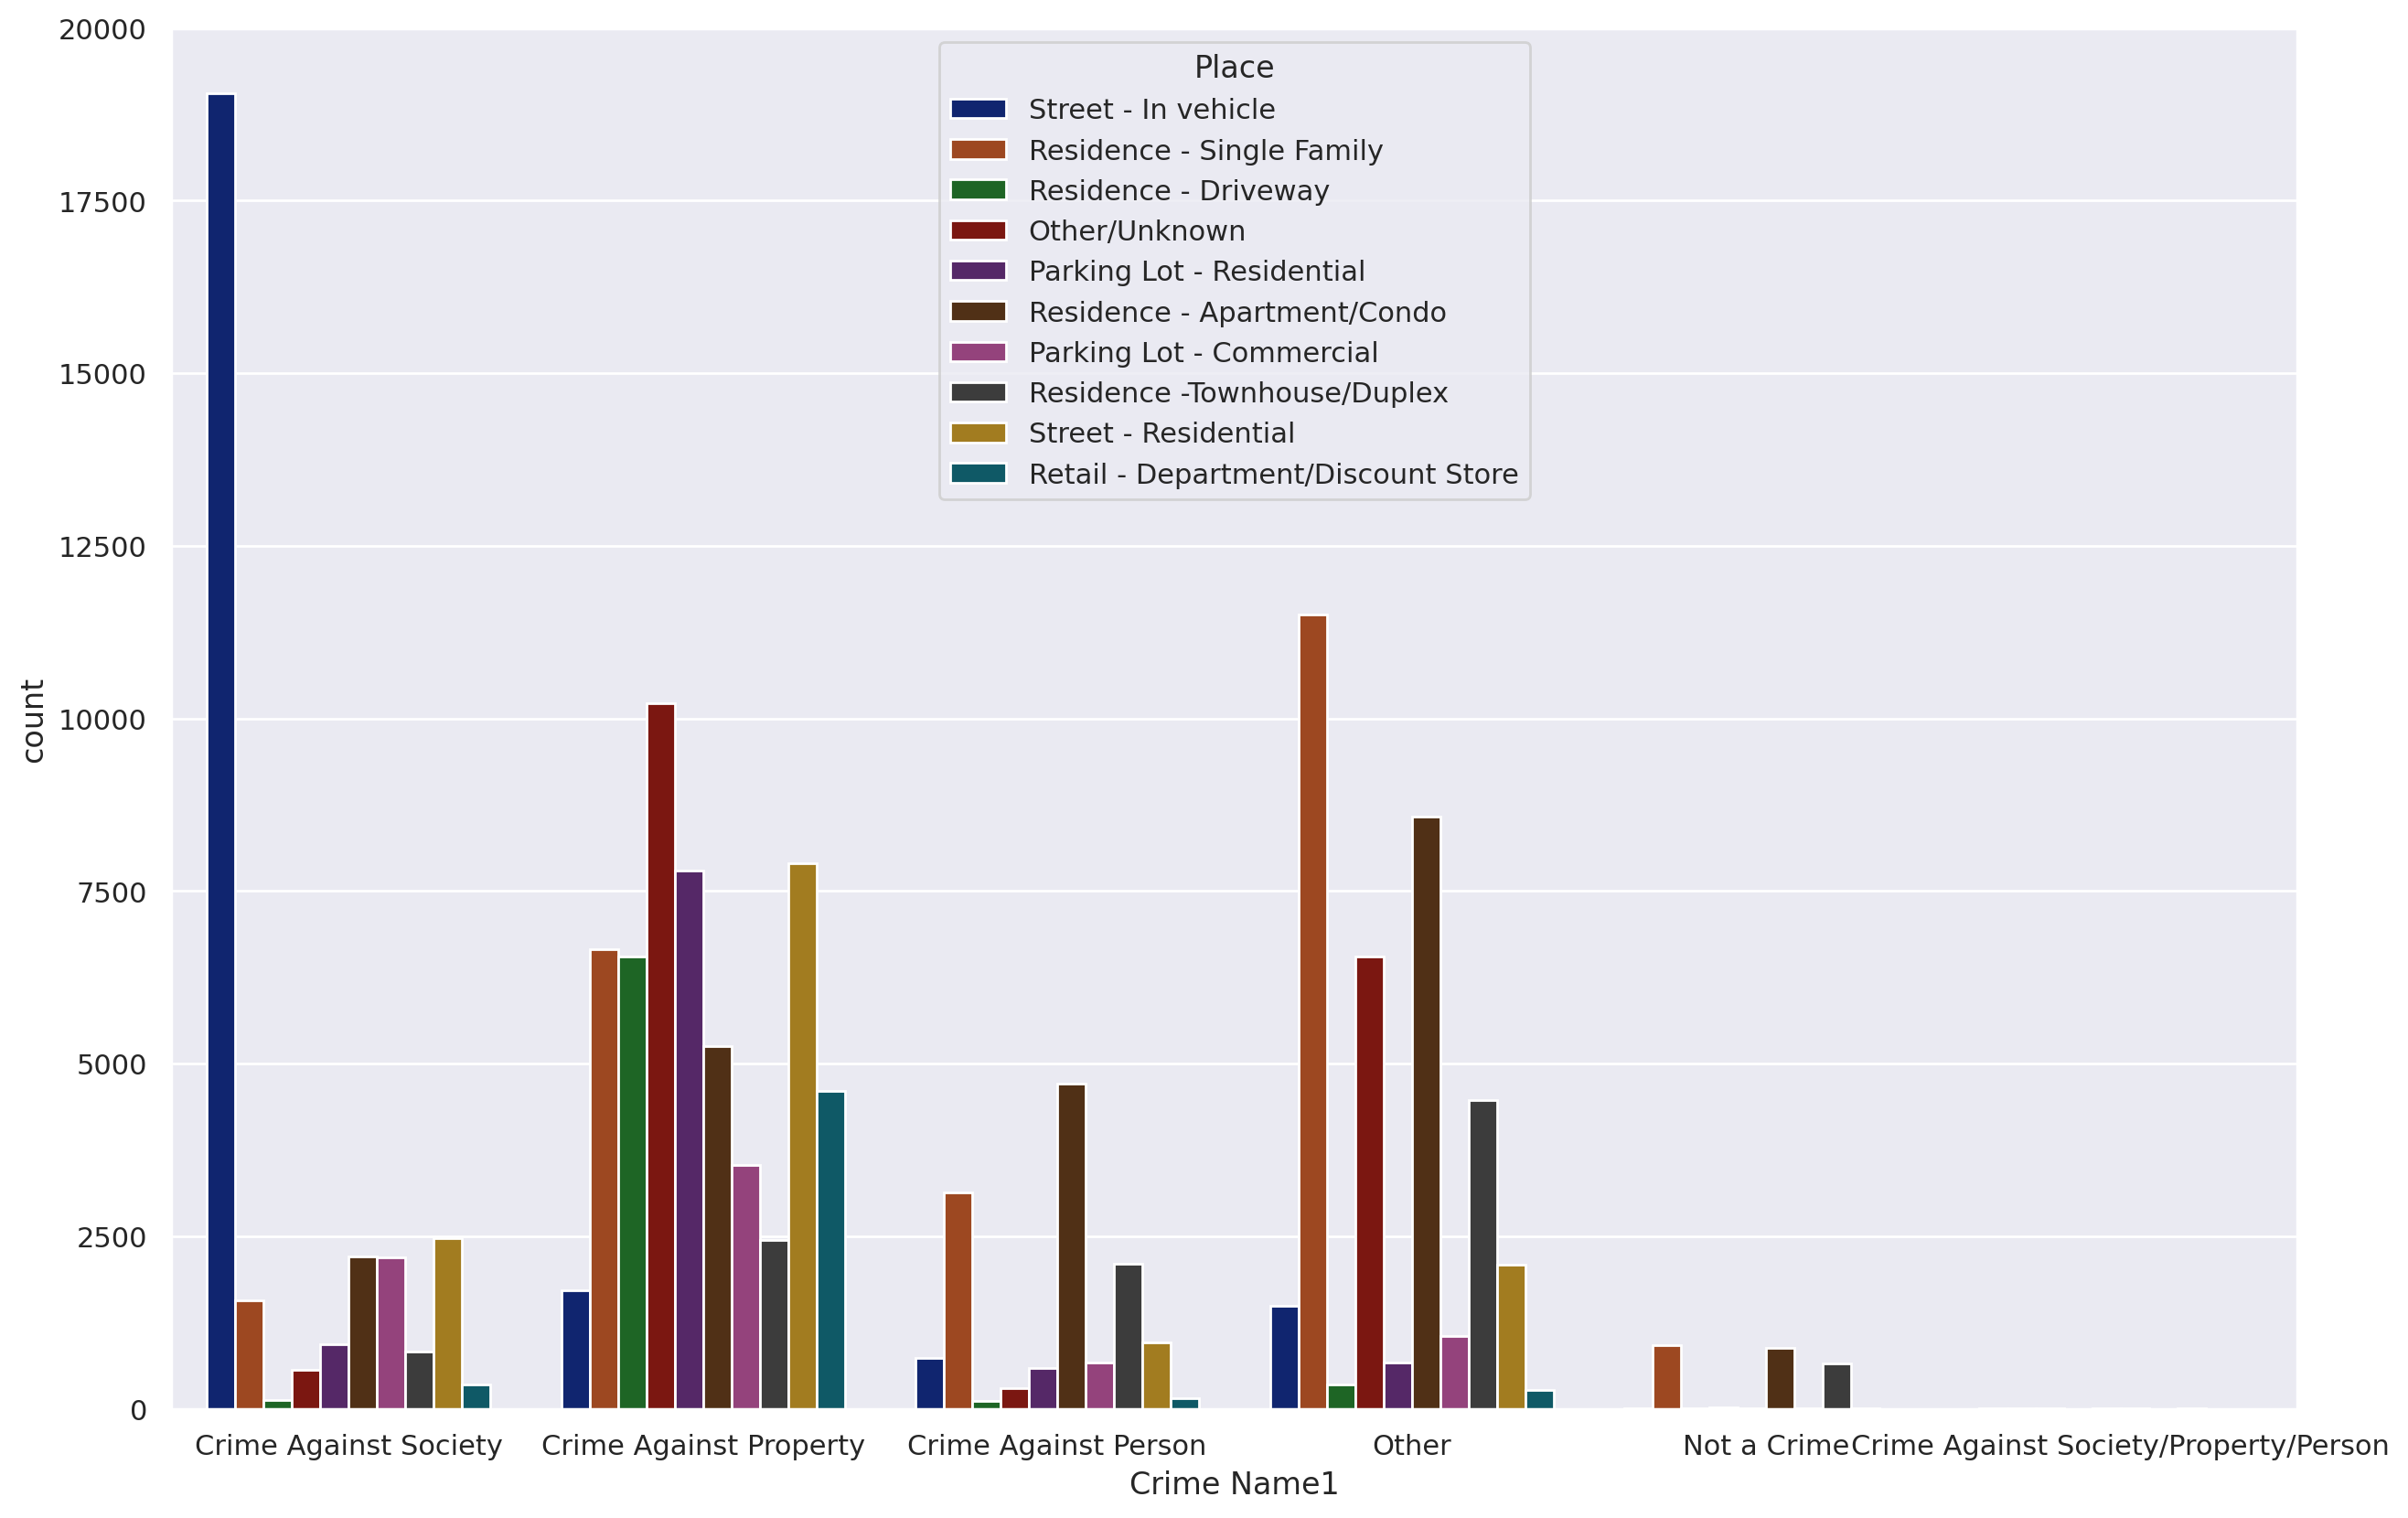

In [ ]:
#The countplot, which is in the format of barchart gives us a better format of visualisation 
plt.figure(figsize =(15,10), dpi=200)
sns.countplot(data = df_highplace, x= 'Crime Name1', hue = 'Place', palette= 'dark')

Using this plot, we can conclude that most “Crimes Against Society” occur on the street, in a person's vehicle, thus making it very important for individuals to adhere to safety protocols when they are in their vehicles. Likewise, for “Crime Against Propert” beside the unknown places, again, streets and parking Lots, considered as the vulnerable places. Moreover, most oof the “Crimes against Person” happens in their apartments.

## 4.4: - Which police district deals with the highest and lowest number of crimes every year?

- A subset dataframe of the original dataframe called crime1_yearly is created which contains the data of police district counts grouped by year. A stacked bar plot is plotted using this dataframe.
- Looking at the graph below, it is clear that 'City of Takoma Park' deals with the least number of crimes, even zero crimes in the year 2022 and 'Silver Spring' district deals with consistently higher number of crimes every year between 2017 - 2022.

In [ ]:
#crime1_yearly is a subset dataframe of the given data frame, which has count of police district names grouped by each year.
crime1_yearly = df.groupby('start_year')['Police District Name'].value_counts().unstack()
print(crime1_yearly)

Police District Name  BETHESDA  CITY OF TAKOMA PARK  GERMANTOWN  \
start_year                                                        
2016                      47.0                  3.0        25.0   
2017                    5442.0               1047.0      5339.0   
2018                    7110.0               1258.0      7128.0   
2019                    6397.0               1211.0      5439.0   
2020                    2140.0                382.0      1857.0   
2021                    4960.0                412.0      4275.0   
2022                    4196.0                  NaN      3517.0   

Police District Name  MONTGOMERY VILLAGE  OTHER  ROCKVILLE  SILVER SPRING  \
start_year                                                                  
2016                                47.0    NaN       47.0           45.0   
2017                              7195.0    1.0     5586.0         8993.0   
2018                              8749.0    4.0     7082.0        11238.0   
2019       

Text(0.5, 1.0, 'Crime count based on police district name - year wise')

<Figure size 1008x864 with 0 Axes>

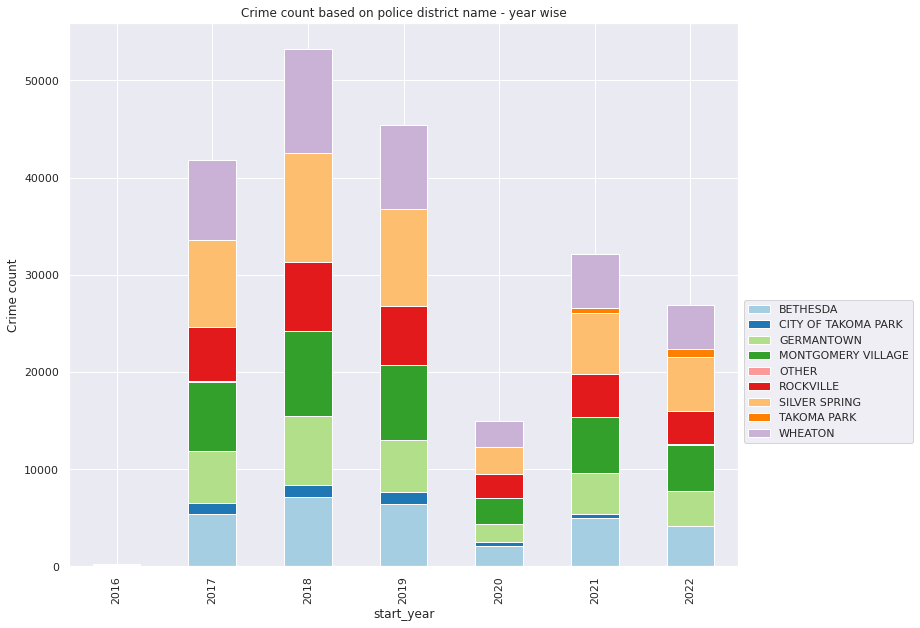

In [ ]:
#The stacked bar chart is plotted using the 'crime1_yearly' sub-dataframe.
plt.figure(figsize=(14,12))
colors = sns.color_palette("Paired", n_colors=9)
crime1_yearly.plot.bar(ylabel='Crime count',stacked=True,color=colors)
plt.legend(bbox_to_anchor=(1,0.5))
plt.title('Crime count based on police district name - year wise')

## 4.5: Question 5 - Which police departments are quickest to respond?

- Each crime record in the dataset contains information about the start time of a crime, as well as the dispatch time of an officer. This information can be helpful to identify the average reponse time for the reported crimes by the different Police Districts.
- These details can help identify Police Districts displaying discrepancies in the time taken to act on a reported crime or vigilance. It will also create an opportunity to compare response time the other Police Districts and make improvements accordingly.

In [ ]:
df_dispatch['Start_Date_Time'] = pd.to_datetime(df_dispatch['Start_Date_Time'])
df_dispatch['Dispatch Date / Time'] = pd.to_datetime(df_dispatch['Dispatch Date / Time'])

# Get the time taken between when the crime was reported and an officer was dispatched
# This is possible by getting the difference between Start_Date_Time and Dispatch Date / Time

df_dispatch['Response_Time'] = (df['Dispatch Date / Time']-df['Start_Date_Time'])

# Convert the Response_Time into absolute values (as -ve time doesn't mean anything) and the unit into hours
df['Response_Time'] = np.absolute(df['Response_Time'].apply(lambda x : x.total_seconds()/3600)) # 1 hr = 60 min = 3600 sec

# Round off the Response_Time values to 2 decimal points
df['Response_Time'] = np.round(df['Response_Time'], 2)

# Get the required dataframe and plot
df_police_response_time = df.groupby('Police District Name')[['Police District Name','Response_Time']].mean()
df_police_response_time = df_police_response_time.sort_values('Response_Time') # Sort the Police District Names according to Response Time
print(df_police_response_time)

KeyError: ignored

In [ ]:
plt.figure(figsize=(35,10), dpi=80)
plt.grid()
sns.barplot(data=df_police_response_time.reset_index(), x='Police District Name', y='Response_Time', hue='Police District Name')

## 4.6: Question 6 -  What is the frequency of each crime based on a year? 


In [ ]:
plt.figure(figsize=(20,8))
df['start_year'].value_counts(normalize=True).plot(kind = 'bar', title = "Year")

Insights:
* Most active year in this dataset is 2017 upto 19%
* Least active year for crimes is 2022 upto 8%

## 4.7: Question 7 -  Which time of the day is the most active for criminals in the county?


Using bar chart, it is easier to compare the number of crimes taking place during day or night, that each police district is handling. Based on the output, the following conclusions can be made:
- Crime count is relatively high during the night across all the police districts.
- Comparison among the police districts shows that 'Silver Spring' handles the most number of crimes at night.

In [ ]:
# This function identifies the time of the day based on the hour of the start date time column
def identify_day_or_night(start_date_time):
    hr, mi = (start_date_time.hour, start_date_time.minute)
    if hr>=7 and hr<18:
      return "Day"
    else:
      return "Night"

In [ ]:
# A new column is created which has the information if the crime has occured during day or night.
df['Day/Night']=df['Start_Date_Time'].apply(identify_day_or_night)

In [ ]:
# The plot shows the comparison of the number of crimes each police district is dealing, based on the time of the day.
plt.figure.figsize=(20,10)
sns.countplot(x=df['Police District Name'],hue=df['Day/Night'],palette='pastel')
plt.xticks(rotation=45, ha="right")

## 4.8: Question 8 - What are the hotspot locations for criminal activities in Montgomery County?

- An overview of areas in the Montgomery County that are being targeted by criminal can be a crucial visualisation for the Police and Government Officials. It can help to dispatch forces for patrolling in the hotspots, make strategies or analyse the reports further. Additionally it provides colour gradient contours of such on geographical maps to clearly identify the locations alongwith crimes rates where red colour identifies such hotspots.

In [ ]:
# Get the required dataframe and plot
df_hotspot_locations = df.groupby('City').agg({'Latitude':'mean','Longitude':'mean','City':'count'}).rename(columns={'City':'Count'})
print(df_hotspot_locations)

# Get all the locations and crime counts into a list
lats_longs = df_hotspot_locations.loc[:,:].values.tolist()

map_obj = folium.Map(location = [39.50470797800558, -77.2923626782645], zoom_start = 7) # Start with Maryland as centre

HeatMap(lats_longs).add_to(map_obj)

map_obj

## 4.9: Question 9 -  What is the relationship between the weekdays and the number of crimes?

Both charts will give us a nice visualisation, although the diffrences are more clear and recognizable in the barchar.
we can see that in the fridays, we have the most number of crimes, as it is the day before the weekends, and most of the people will stay out late. Also, in sundays, we have the least number of crimes, as it is the fisrt day befor the week starts, so people would goo sooner, and commited less crimes. 

In [ ]:
# The disribition of the number of crimes on the weekdays, can be visualised in the form of pie chart
sorted_counts = df["start_weekday"].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%.3f')
plt.title('Crime Records in Each Days of the Week ')

In [ ]:
df['start_weekday'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count of Tips Received", labelpad=14)
plt.ylabel("Day of Week", labelpad=14)
plt.title("Number of Crimes happend by Day of Week", y=1.02);
plt.savefig('weekdays_for now.png')

## 4.10: Question 10 -  Which cities are considered the safest and the most dangerous ones in terms of the  number of crimes?

Each crime record in the dataset is accompanied by the city where it occurred. As a result of the records gathered in the defined period of time, this question aims to find the most dangerous and safest cities in the dataset. We can create an array of city names and the recorded crimes for each by using the `value_counts()` method, and convert it to a dataframe by using `to_frame()`.
To visualise this information, we can use a bar chart, to plot the counted values for each city.

In [ ]:
a = df['City'].value_counts().to_frame()
a = a.reset_index()
#Changing the columns name to a meaningfull format
a.rename(columns={'index': 'City', 'City': 'Crimes'}, inplace=True)
print(a)
print(type(a))

First we use the `sort_values` on the created dataframe based on the number of crimes, and then we use barplot To visualise the most dengerous and safest citie. 
As it is presented **SILVER SPRING**, which is in red, has the most number Of crimes in the dataset, and can be considered as the most dengerous city in Maryland county. 


In [ ]:
top10_crime = a.sort_values('Crimes',ascending=False)[:10].reset_index(drop=True)
top10_crime

In [ ]:
#Refrence: https://www.dataquest.io/blog/how-to-plot-a-bar-graph-matplotlib/

top_crime = top10_crime['Crimes']
colors = ['grey' if (s < max(top_crime)) else 'red' for s in top_crime]

fig, ax = plt.subplots(figsize=(30,10))
sns.set_style('white')
ax=sns.barplot(x='City', y='Crimes',
               data=top10_crime, palette=colors)
plt.title('The cities with the highest number of crimes', fontsize=55)
plt.xlabel(None)
plt.xticks(fontsize=16)
plt.ylabel('Number of Crimes', fontsize=35)
plt.yticks(fontsize=15)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
plt.show()

Likewise, finding the safest city, we figure out there are multiples cities with the minumum number of crimes, just one record, to find the list those cities we can define `["City"]==1` condition, in the created dataframe with `value_counts()` method.

In [ ]:
safe_cities = df['City'].value_counts().to_frame()
print ("the number of cities with the least number of crimes:  ",safe_cities[safe_cities["City"]==1].shape)
print ("the names of cities with the least number of crimes:  ",safe_cities[safe_cities["City"]==1])


As a result there are 21 cities which can be consider as the safest cities in this area, to have a better visualisation, in order to compare the numbers in the safest cities we are going plot the 30 safest cities in Marylan county. These 21 cities are shown in blue, in the following bar plot.

In [ ]:
top30_safe = a.sort_values('Crimes',ascending=False)[-30:].reset_index(drop=True)
top30_safe

In [ ]:
#Ref: https://www.dataquest.io/blog/how-to-plot-a-bar-graph-matplotlib/

top_safe = top30_safe['Crimes']
colors = ['grey' if (s > min(top_safe)) else 'blue' for s in top_safe]

fig, ax = plt.subplots(figsize=(30,10))
sns.set_style('white')
ax=sns.barplot(x='City', y='Crimes',
               data=top30_safe, palette=colors)
plt.title('The cities with the lowest number of crimes', fontsize=55)
plt.xlabel(None)
# As the number of cities is increased for this plot, I am using a rotation for lables, to have a bettter visualisation
plt.xticks(fontsize=16, rotation='vertical') 
plt.ylabel('Number of Crimes', fontsize=35)
plt.yticks(fontsize=16)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
plt.show()